# Evaluating Majority Voting Approach

## Operations

### Read standard concepts

In [2]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
operationsDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Procedure') & (athenaDf.concept_class_id == 'Procedure')]
operationsDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254913,42534812,Ultrasonography of calf of right lower leg,Procedure,SNOMED,Procedure,S,1001000087107,20180131,20991231,NaN
2254926,42534815,Right fluoroscopic retrograde pyelography,Procedure,SNOMED,Procedure,S,101000087107,20180131,20991231,NaN
2254929,37108565,Ultrasonography of left elbow,Procedure,SNOMED,Procedure,S,1011000087109,20170731,20991231,NaN
2254947,37108566,Ultrasonography of right elbow,Procedure,SNOMED,Procedure,S,1021000087101,20170731,20991231,NaN
2254970,37117086,Ultrasonography of left foot,Procedure,SNOMED,Procedure,S,1031000087104,20170731,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271637,3663244,Esophagogastroduodenoscopy gastric outlet redu...,Procedure,SNOMED,Procedure,S,870424001,20200731,20991231,NaN
3271638,3663245,Quantitative electroencephalogram,Procedure,SNOMED,Procedure,S,870425000,20200731,20991231,NaN
3271639,3663246,Angioplasty using paclitaxel coated balloon ca...,Procedure,SNOMED,Procedure,S,870426004,20200731,20991231,NaN
3271660,3663267,Sequential anastomosis of free right internal ...,Procedure,SNOMED,Procedure,S,871498004,20200731,20991231,NaN


### Read operations file

In [3]:
import pandas as pd

sourceOperationsDf = pd.read_csv('data/20004_operation.csv', dtype=str)
sourceOperationsDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20004,scan / x-ray,1603,NaN,NaN,332,NaN,0.654131293296814,UNCHECKED,NaN,0,4178367,VALUE,NaN,NaN,1603436039043
1,20004,exercise ecg,1599,NaN,NaN,150,NaN,1.0,APPROVED,NaN,0,4261794,VALUE,NaN,NaN,1603436039045
2,20004,liver surgery,1450,NaN,NaN,435,NaN,0.7727025747299194,APPROVED,NaN,0,4171687,VALUE,NaN,NaN,1603436039047
3,20004,lymph node surgery,1537,NaN,NaN,1537,NaN,0.6767706274986267,APPROVED,NaN,0,4194197,VALUE,NaN,NaN,1603436039049
4,20004,bone marrow biopsy,1615,NaN,NaN,116,NaN,1.0,APPROVED,NaN,0,4120443,VALUE,NaN,NaN,1603436039051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,20004,pancreatic transplant,1457,NaN,NaN,7,NaN,1.0,APPROVED,NaN,0,4266668,VALUE,NaN,NaN,1603436039260
250,20004,amputation of toe,1442,NaN,NaN,506,NaN,1.0,APPROVED,NaN,0,4159766,VALUE,NaN,NaN,1603436039260
251,20004,amputation of leg,1440,NaN,NaN,240,NaN,1.0,APPROVED,NaN,0,4219032,VALUE,NaN,NaN,1603436039261
252,20004,endometrial ablation,1360,NaN,NaN,2851,NaN,1.0,APPROVED,NaN,0,4141940,VALUE,NaN,NaN,1603436039262


### Read mapped operations file

In [4]:
import pandas as pd

# mappedOperationsDf = pd.read_csv('data/20004_operation_mapped_majority_voting.csv')
mappedOperationsDf = pd.read_csv('/tmp/20004_operation_mapped.csv')
mappedOperationsDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Radiographic imaging procedure,Low
1,1,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Scapula X-ray,Low
2,2,scan / x-ray,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,Dual energy X-ray absorptiometry scan of wrist,Low
3,3,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,Electrocardiogram with exercise test,Low
4,4,exercise ecg,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,Exercise challenge,Low
...,...,...,...,...,...,...,...
635,635,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Medium
636,636,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of lower limb,Low
637,637,endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,High
638,638,heart transplant,Transplantation of heart,Heart transplant,Heart transplant,Heart transplant,Medium


### Analyse mapped operations file

In [5]:
mappedOperationsDf.confidence.value_counts()

Low       553
Medium     55
High       32
Name: confidence, dtype: int64

In [6]:
mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
18,18,barium meal / barium swallow,Barium meal,Bread barium swallow,Barium meal,Barium meal,Medium
20,20,ecg/electrocardiogram,Electrocardiographic procedure,ECG - electrocardiogram (& general),ECG - electrocardiogram (& general),ECG - electrocardiogram (& general),Medium
31,31,achilles tendon repair,Repair of tendo achilles,Repair of tendo achilles,Tendon repair: [NOS] or [Achilles],Repair of tendo achilles,Medium
42,42,barium enema,Barium enema,Barium enema,Barium enema,Barium enema,High
43,43,liver biopsy,Biopsy of liver,Biopsy of liver,Biopsy of liver,Biopsy of liver,High
...,...,...,...,...,...,...,...
632,632,pancreatic transplant,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant,Medium
634,634,amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,High
635,635,amputation of leg,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg,Medium
637,637,endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,High


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

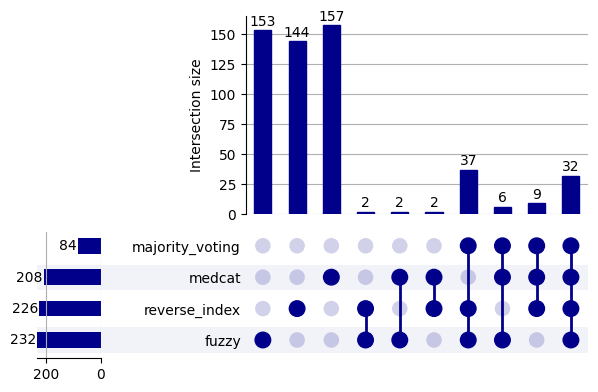

In [7]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsDf[mappedOperationsDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [8]:
mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedOperationsMedcatDf.reset_index(drop = True, inplace = True)
mappedOperationsMedcatDf.columns = mappedOperationsMedcatDf.columns.droplevel(1)
mappedOperationsMedcatDf.medcatConcept = mappedOperationsMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedOperationsMedcatDf.searchPhrase = mappedOperationsMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedOperationsFuzzyDf.reset_index(drop = True, inplace = True)
mappedOperationsFuzzyDf.columns = mappedOperationsFuzzyDf.columns.droplevel(1)
mappedOperationsFuzzyDf.fuzzyConcept = mappedOperationsFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedOperationsFuzzyDf.searchPhrase = mappedOperationsFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedOperationsReverseIndexDf.reset_index(drop = True, inplace = True)
mappedOperationsReverseIndexDf.columns = mappedOperationsReverseIndexDf.columns.droplevel(1)
mappedOperationsReverseIndexDf.reverseIndexConcept = mappedOperationsReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedOperationsReverseIndexDf.searchPhrase = mappedOperationsReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedOperationsMajorityVotingDf = mappedOperationsDf[mappedOperationsDf.majorityVoting.notna() & mappedOperationsDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedOperationsMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedOperationsMajorityVotingDf.columns = mappedOperationsMajorityVotingDf.columns.droplevel(1)
mappedOperationsMajorityVotingDf.majorityVoting = mappedOperationsMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedOperationsMajorityVotingDf.searchPhrase = mappedOperationsMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_3824928/2921637815.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsMedcatDf = mappedOperationsDf[mappedOperationsDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3824928/2921637815.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsFuzzyDf = mappedOperationsDf[mappedOperationsDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3824928/2921637815.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedOperationsReverseIndexDf = mappedOperationsDf[mappedOperationsDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['uniq

In [9]:
mappedOperationsCuratedDf = sourceOperationsDf\
    .merge(operationsDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name']]
mappedOperationsCuratedDf = mappedOperationsCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedOperationsCuratedDf

,sourceName,sourceValueCode,curatedConcept
0,scan / x-ray,1603,Radiographic imaging procedure
1,exercise ecg,1599,Electrocardiogram with exercise test
2,liver surgery,1450,Operation on liver
3,lymph node surgery,1537,Operation on lymph node
4,bone marrow biopsy,1615,Bone marrow sampling
...,...,...,...
249,pancreatic transplant,1457,Transplantation of pancreas
250,amputation of toe,1442,Amputation of toe
251,amputation of leg,1440,Amputation of lower limb
252,endometrial ablation,1360,Endometrial ablation


In [10]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedOperationsFinalDf = mappedOperationsCuratedDf\
    .merge(mappedOperationsMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedOperationsFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedOperationsReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedOperationsMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedOperationsFinalDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,scan / x-ray,1603,Radiographic imaging procedure,Radiographic imaging procedure,Scapula X-ray,Dual energy X-ray absorptiometry scan of wrist,NaN
1,exercise ecg,1599,Electrocardiogram with exercise test,Electrocardiogram with exercise test,Exercise challenge,Stress ECG,NaN
2,liver surgery,1450,Operation on liver,Operation on liver,Laser surgery,Radioimmunoguided surgery,NaN
3,lymph node surgery,1537,Operation on lymph node,Structure of lymph node,Procedure on lymph node,Excision of inguinal lymph node and pelvic lym...,NaN
4,bone marrow biopsy,1615,Bone marrow sampling,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN
...,...,...,...,...,...,...,...
249,pancreatic transplant,1457,Transplantation of pancreas,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
250,amputation of toe,1442,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe,Amputation of toe
251,amputation of leg,1440,Amputation of lower limb,Amputation of lower limb,Amputation of leg,Amputation of leg,Amputation of leg
252,endometrial ablation,1360,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

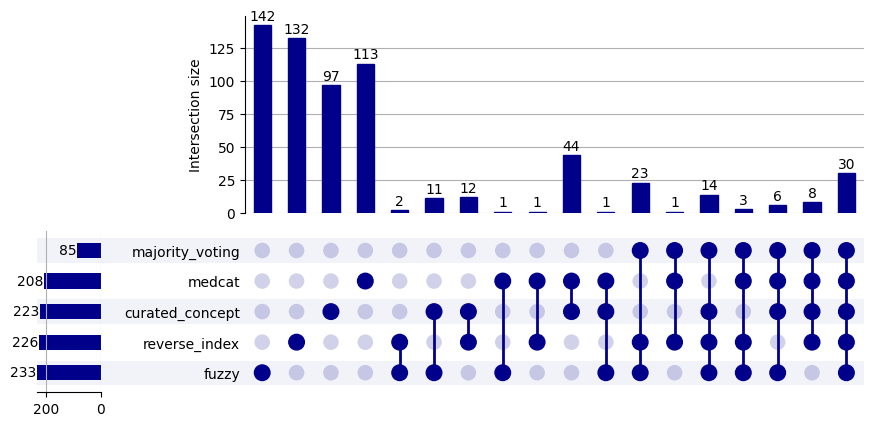

In [11]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedOperationsFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedOperationsFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedOperationsFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedOperationsFinalDf.majorityVoting)
mappedIdsCurated = set(mappedOperationsFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [12]:
matchingMedcatOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.medcatConcept].shape[0])/mappedOperationsFinalDf.medcatConcept.notna().sum() * 100, 2)
matchingFuzzyOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.fuzzyConcept].shape[0])/mappedOperationsFinalDf.fuzzyConcept.notna().sum() * 100, 2)
matchingReverseIndexOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.reverseIndexConcept].shape[0])/mappedOperationsFinalDf.reverseIndexConcept.notna().sum() * 100, 2)
matchingmajorityVotingOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.majorityVoting].shape[0])/mappedOperationsFinalDf.majorityVoting.notna().sum() * 100, 2)
notMatchingMedcatOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)].shape[0])/mappedOperationsFinalDf.medcatConcept.notna().sum() * 100, 2)
notMatchingFuzzyOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.fuzzyConcept)].shape[0])/mappedOperationsFinalDf.fuzzyConcept.notna().sum() * 100, 2)
notMatchingReverseIndexOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.reverseIndexConcept)].shape[0])/mappedOperationsFinalDf.reverseIndexConcept.notna().sum() * 100, 2)
notMatchingmajorityVotingOperationsPercentage = round((mappedOperationsFinalDf[mappedOperationsFinalDf.majorityVoting.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.majorityVoting)].shape[0])/mappedOperationsFinalDf.majorityVoting.notna().sum() * 100, 2)
totalMedcatOperationsPercentage = round(mappedOperationsFinalDf.medcatConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalFuzzyOperationsPercentage = round(mappedOperationsFinalDf.fuzzyConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalReverseIndexOperationsPercentage = round(mappedOperationsFinalDf.reverseIndexConcept.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)
totalMajorityVotingOperationsPercentage = round(mappedOperationsFinalDf.majorityVoting.notna().sum()/mappedOperationsFinalDf.shape[0] * 100, 2)

### Plot total mapping percentage

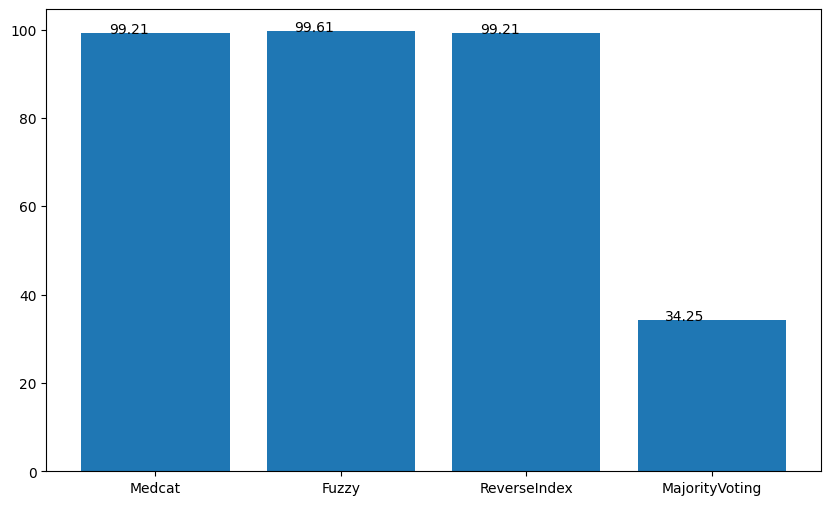

In [13]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [totalMedcatOperationsPercentage, totalFuzzyOperationsPercentage, totalReverseIndexOperationsPercentage, totalMajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot matching percentages

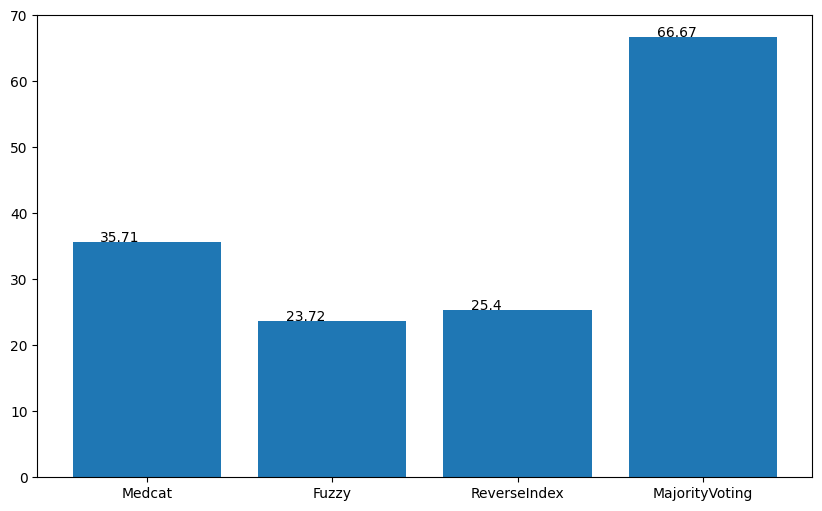

In [14]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatOperationsPercentage, matchingFuzzyOperationsPercentage, matchingReverseIndexOperationsPercentage, matchingmajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

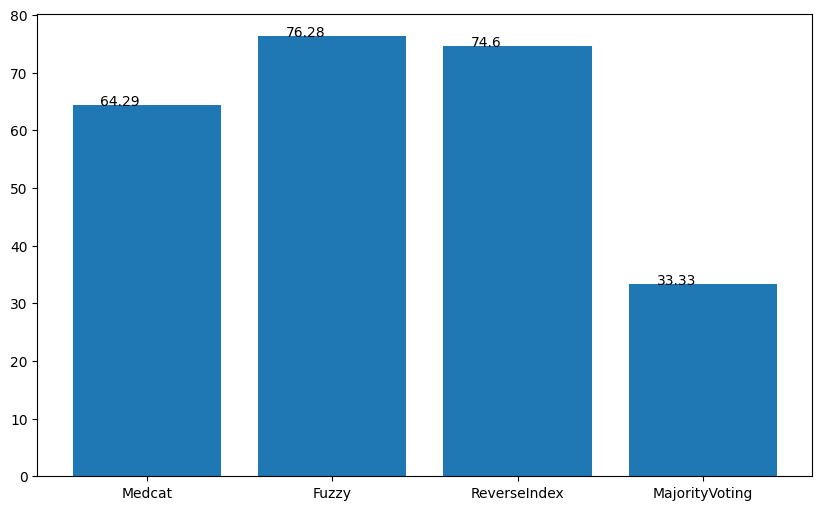

In [15]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatOperationsPercentage, notMatchingFuzzyOperationsPercentage, notMatchingReverseIndexOperationsPercentage, notMatchingmajorityVotingOperationsPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

In [148]:
mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
156,sterilisation,1362,Sterilization procedure,NaN,Stabilization,Sterilising procedure,NaN
246,NaN,99999,NaN,NaN,NaN,NaN,NaN


In [149]:
mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
246,NaN,99999,NaN,NaN,NaN,NaN,NaN


In [150]:
mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
146,colectomy/hemicolectomy,1464,Excision of colon,Excision of colon,Left hemicolectomy and colostomy,NaN,NaN
246,NaN,99999,NaN,NaN,NaN,NaN,NaN


In [151]:
mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
3,lymph node surgery,1537,Operation on lymph node,Structure of lymph node,Procedure on lymph node,Excision of inguinal lymph node and pelvic lym...,NaN
5,duodenal surgery,1529,Operation on duodenum,Duodenal,Optional surgery,Duodenal switch,NaN
6,barium meal / barium swallow,1611,Barium swallow,Barium meal,Bread barium swallow,Barium meal,Barium meal
7,ecg/electrocardiogram,1545,Electrocardiographic monitoring,Electrocardiographic procedure,ECG - electrocardiogram (& general),ECG - electrocardiogram (& general),ECG - electrocardiogram (& general)
9,breast cyst/abscess removal,1513,Lung cyst removal,Cyst of breast,Incision of abscess of breast,Diagnostic aspiration liver cyst &/or abscess,NaN
...,...,...,...,...,...,...,...
239,cerebral artery aneurysm surgery or clipping,1106,"Application of clamp to cerebral aneurysm, Cru...",Surgery,Excision of aneurysm of cerebral artery,Aneurysm clipping,NaN
240,ct colonoscopy,1613,Virtual CT colonoscopy,Computed tomography of colon,Colonoscopy,Virtual CT colonoscopy,NaN
241,hernia surgery,1402,Hernia repair,Surgery,Ritual surgery,Radioimmunoguided surgery,NaN
243,heart surgery,1069,Operation on heart,Cardiac surgery,Open heart surgery,Open heart surgery,Open heart surgery


## Illness

### Read standard concepts

In [16]:
import pandas as pd

athenaDf = pd.read_csv('data/CONCEPT.csv', sep='\t', dtype=str)
illnessDf = athenaDf[athenaDf.invalid_reason.isna() & (athenaDf.standard_concept == 'S') & (athenaDf.vocabulary_id == 'SNOMED') & (athenaDf.domain_id == 'Condition') & (athenaDf.concept_class_id == 'Clinical Finding')]
illnessDf

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
2254914,43530605,Pulmonary embolism with pulmonary infarction,Condition,SNOMED,Clinical Finding,S,1001000119102,20130731,20991231,NaN
2254915,45757048,Asymmetry of prostate,Condition,SNOMED,Clinical Finding,S,100191000119105,20150131,20991231,NaN
2254916,46269689,Muscle spasm of thoracic back,Condition,SNOMED,Clinical Finding,S,100211000119106,20150731,20991231,NaN
2254917,36712666,Acquired pericardial cyst,Condition,SNOMED,Clinical Finding,S,100231000119101,20170131,20991231,NaN
2254918,37016098,Myelopathy due to spinal stenosis of lumbar re...,Condition,SNOMED,Clinical Finding,S,100491000119103,20160131,20991231,NaN
...,...,...,...,...,...,...,...,...,...,...
3271658,3663265,Sprain of ulnar carpal complex ligament,Condition,SNOMED,Clinical Finding,S,870768000,20200731,20991231,NaN
3271659,3663266,Presenting part of fetus not engaged,Condition,SNOMED,Clinical Finding,S,871478009,20200731,20991231,NaN
3271669,3663278,Acquired abnormality of atrioventricular (not ...,Condition,SNOMED,Clinical Finding,S,874782009,20200731,20991231,NaN
3271672,3663281,Lower respiratory infection caused by SARS-CoV-2,Condition,SNOMED,Clinical Finding,S,880529761000119102,20200731,20991231,NaN


### Read illness file

In [17]:
import pandas as pd

sourceIllnessDf = pd.read_csv('data/20002_non-cancer_illness.csv', dtype=str)
sourceIllnessDf

,sourceCode,sourceName,sourceValueCode,sourceValueName,sourceUnitName,sourceFrequency,sourceAutoAssignedConceptIds,matchScore,mappingStatus,statusSetBy,statusSetOn,conceptId,mappingType,comment,createdBy,createdOn
0,20002,diabetes,1220,diabetes,NaN,23996,NaN,0.8904300332069397,APPROVED,Vaclav,1604396402676,201820,VALUE,NaN,Vaclav,1604396395977
1,20002,fracture hand,1638,fracture hand,NaN,441,NaN,0.8478937149047852,APPROVED,Vaclav,1604397104088,4071876,VALUE,NaN,<auto>,1604359804705
2,20002,uterine problem,1552,uterine problem,NaN,91,NaN,0.7672346234321594,APPROVED,Vaclav,1604404677075,4129177,VALUE,NaN,Vaclav,1604404675001
3,20002,asbestosis,1120,asbestosis,NaN,208,NaN,1.0,APPROVED,Vaclav,1604361691699,256450,VALUE,NaN,<auto>,1604359804727
4,20002,haemophilia,1328,haemophilia,NaN,78,NaN,1.0,APPROVED,Vaclav,1604361697782,4236898,VALUE,NaN,<auto>,1604359804809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,20002,endometriosis,1402,endometriosis,NaN,4533,NaN,1.0,APPROVED,Vaclav,1604395600509,433527,VALUE,NaN,<auto>,1604359879127
442,20002,bell's palsy/facial nerve palsy,1250,bell's palsy/facial nerve palsy,NaN,588,NaN,0.6373665928840637,APPROVED,Vaclav,1604417223795,374923,VALUE,NaN,<auto>,1604359879335
443,20002,female infertility,1403,female infertility,NaN,674,NaN,1.0,APPROVED,Vaclav,1604395603304,201909,VALUE,NaN,<auto>,1604359879718
444,20002,male infertility,1404,male infertility,NaN,38,NaN,1.0,APPROVED,Vaclav,1604395604447,198197,VALUE,NaN,<auto>,1604359880370


### Read mapped illness file

In [18]:
import pandas as pd

# baseDir = '/superbugai-data/yash/temp/'
# mappedIllnessDf = pd.read_csv(baseDir + '20002_non-cancer_illness_mapped.csv')
# mappedIllnessDf = pd.read_csv('data/20002_non-cancer_illness_mapped_majority_voting.csv')
mappedIllnessDf = pd.read_csv('/tmp/20002_non-cancer_illness_mapped.csv')
mappedIllnessDf

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
0,0,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetes mellitus,Low
1,1,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Prediabetes,Low
2,2,diabetes,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,Diabetic neuropathy &/or diabetic polyneuropathy,Low
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
4,4,uterine problem,Uterine structure,Uterine prolapse,Uterine contractions problem,Uterine structure,Low
...,...,...,...,...,...,...,...
900,900,female infertility,Female infertility,Female infertility,Female infertility,Female infertility,High
901,901,male infertility,Male infertility,Male infertility,Male infertility,Male infertility,High
902,902,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Kidney structure,Low
903,903,other renal/kidney problem,Kidney structure,Peer problem in remission,Ether overdose,Peer problem in remission,Low


### Analyse mapped illness file

In [19]:
mappedIllnessDf.confidence.value_counts()

Low       632
High      157
Medium    116
Name: confidence, dtype: int64

In [20]:
len(mappedIllnessDf.searchPhrase.unique())

444

In [21]:
mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])]

,Unnamed: 0,searchPhrase,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting,confidence
3,3,fracture hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,High
7,7,asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis,High
8,8,haemophilia,NaN,Hemophilia,Hemophilia,Hemophilia,Medium
10,10,rheumatic fever,Rheumatic fever,Rheumatic fever,Rheumatic fever,Rheumatic fever,High
11,11,diabetes insipidus,Diabetes insipidus,Diabetes insipidus,Diabetes insipidus,Diabetes insipidus,High
...,...,...,...,...,...,...,...
890,890,pneumonia,Pneumonia,Pneumonia,Pneumonia and influenza &/or pneumonia,Pneumonia,Medium
892,892,peptic ulcer,Peptic ulcer,Peptic ulcer,Peptic ulcer,Peptic ulcer,High
896,896,endometriosis,Endometriosis,Endometriosis,Endometriosis,Endometriosis,High
900,900,female infertility,Female infertility,Female infertility,Female infertility,Female infertility,High


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

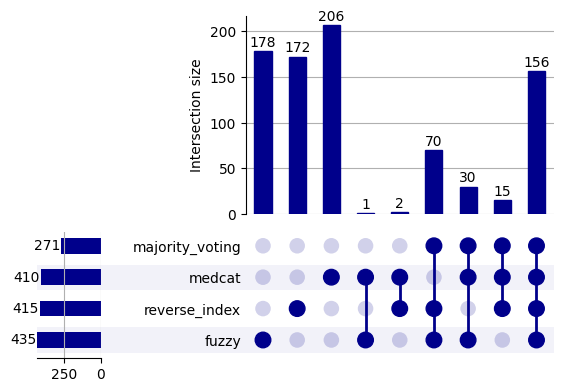

In [22]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessDf[mappedIllnessDf.confidence.isin(['Medium', 'High'])].majorityVoting)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Create final dataframe

In [23]:
mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
mappedIllnessMedcatDf.reset_index(drop = True, inplace = True)
mappedIllnessMedcatDf.columns = mappedIllnessMedcatDf.columns.droplevel(1)
mappedIllnessMedcatDf.medcatConcept = mappedIllnessMedcatDf.medcatConcept.apply(lambda x: x[0])
mappedIllnessMedcatDf.searchPhrase = mappedIllnessMedcatDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
mappedIllnessFuzzyDf.reset_index(drop = True, inplace = True)
mappedIllnessFuzzyDf.columns = mappedIllnessFuzzyDf.columns.droplevel(1)
mappedIllnessFuzzyDf.fuzzyConcept = mappedIllnessFuzzyDf.fuzzyConcept.apply(lambda x: x[0])
mappedIllnessFuzzyDf.searchPhrase = mappedIllnessFuzzyDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
mappedIllnessReverseIndexDf.reset_index(drop = True, inplace = True)
mappedIllnessReverseIndexDf.columns = mappedIllnessReverseIndexDf.columns.droplevel(1)
mappedIllnessReverseIndexDf.reverseIndexConcept = mappedIllnessReverseIndexDf.reverseIndexConcept.apply(lambda x: x[0])
mappedIllnessReverseIndexDf.searchPhrase = mappedIllnessReverseIndexDf.searchPhrase.apply(lambda x: str(x[0]))
mappedIllnessMajorityVotingDf = mappedIllnessDf[mappedIllnessDf.majorityVoting.notna() & mappedIllnessDf.confidence.isin(['Medium', 'High'])].groupby(['searchPhrase'])['searchPhrase', 'majorityVoting'].agg(['unique'])
mappedIllnessMajorityVotingDf.reset_index(drop = True, inplace = True)
mappedIllnessMajorityVotingDf.columns = mappedIllnessMajorityVotingDf.columns.droplevel(1)
mappedIllnessMajorityVotingDf.majorityVoting = mappedIllnessMajorityVotingDf.majorityVoting.apply(lambda x: x[0])
mappedIllnessMajorityVotingDf.searchPhrase = mappedIllnessMajorityVotingDf.searchPhrase.apply(lambda x: str(x[0]))

/tmp/ipykernel_3824928/2855382503.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessMedcatDf = mappedIllnessDf[mappedIllnessDf.medcatConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'medcatConcept'].agg(['unique'])
/tmp/ipykernel_3824928/2855382503.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessFuzzyDf = mappedIllnessDf[mappedIllnessDf.fuzzyConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'fuzzyConcept'].agg(['unique'])
/tmp/ipykernel_3824928/2855382503.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mappedIllnessReverseIndexDf = mappedIllnessDf[mappedIllnessDf.reverseIndexConcept.notna()].groupby(['searchPhrase'])['searchPhrase', 'reverseIndexConcept'].agg(['unique'])
/tmp/ipykernel_382492

In [24]:
mappedIllnessCuratedDf = sourceIllnessDf\
    .merge(illnessDf, how='left', left_on='conceptId', right_on='concept_id')[['sourceName', 'sourceValueCode', 'concept_name']]
mappedIllnessCuratedDf = mappedIllnessCuratedDf.rename(columns={'concept_name': 'curatedConcept'})
mappedIllnessCuratedDf

,sourceName,sourceValueCode,curatedConcept
0,diabetes,1220,Diabetes mellitus
1,fracture hand,1638,Fracture of hand
2,uterine problem,1552,Uterus problem
3,asbestosis,1120,Asbestosis
4,haemophilia,1328,Hemophilia
...,...,...,...
441,endometriosis,1402,Endometriosis (clinical)
442,bell's palsy/facial nerve palsy,1250,Bell's palsy
443,female infertility,1403,Female infertility
444,male infertility,1404,Male infertility


In [25]:
# pd.concat([mappedOperationsCuratedDf, mappedOperationsFuzzyDf], keys=['sourceValueCode', 'id'])
mappedIllnessFinalDf = mappedIllnessCuratedDf\
    .merge(mappedIllnessMedcatDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
        .merge(mappedIllnessFuzzyDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
            .merge(mappedIllnessReverseIndexDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])\
                .merge(mappedIllnessMajorityVotingDf, how='left', left_on='sourceName', right_on='searchPhrase').drop(columns=['searchPhrase'])
mappedIllnessFinalDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,diabetes,1220,Diabetes mellitus,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,fracture hand,1638,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
3,asbestosis,1120,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,Hemophilia,Hemophilia
...,...,...,...,...,...,...,...
441,endometriosis,1402,Endometriosis (clinical),Endometriosis,Endometriosis,Endometriosis,Endometriosis
442,bell's palsy/facial nerve palsy,1250,Bell's palsy,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN
443,female infertility,1403,Female infertility,Female infertility,Female infertility,Female infertility,Female infertility
444,male infertility,1404,Male infertility,Male infertility,Male infertility,Male infertility,Male infertility


### Plot the output of all the mapping strategies

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

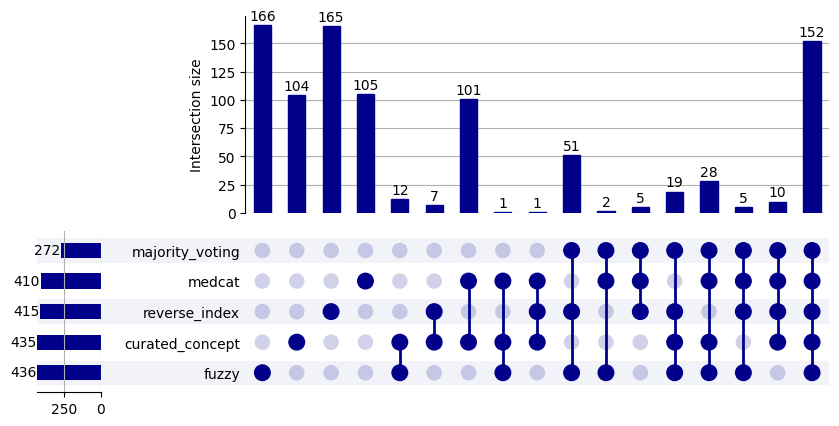

In [26]:
from upsetplot import from_contents, UpSet


mappedIdsMedcat = set(mappedIllnessFinalDf.medcatConcept)
mappedIdsFuzzy = set(mappedIllnessFinalDf.fuzzyConcept)
mappedIdsReverseIndex = set(mappedIllnessFinalDf.reverseIndexConcept)
mappedIdsMajorityVoting = set(mappedIllnessFinalDf.majorityVoting)
mappedIdsCurated = set(mappedIllnessFinalDf.curatedConcept)

upsetPlotData = from_contents(
    {
        'medcat': mappedIdsMedcat
        , 'fuzzy': mappedIdsFuzzy
        , 'reverse_index': mappedIdsReverseIndex
        , 'majority_voting': mappedIdsMajorityVoting
        , 'curated_concept': mappedIdsCurated
        }
    )

UpSet(upsetPlotData, show_counts=True, facecolor="darkblue").plot()

### Calculate matching and not matching percentages

In [27]:
matchingMedcatIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0])/mappedIllnessFinalDf.medcatConcept.notna().sum() * 100, 2)
matchingMedcatIllnessPercentage

67.28

In [28]:
matchingMedcatIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0])/mappedIllnessFinalDf.medcatConcept.notna().sum() * 100, 2)
matchingFuzzyIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.fuzzyConcept].shape[0])/mappedIllnessFinalDf.fuzzyConcept.notna().sum() * 100, 2)
matchingReverseIndexIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.reverseIndexConcept].shape[0])/mappedIllnessFinalDf.reverseIndexConcept.notna().sum() * 100, 2)
matchingmajorityVotingIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.majorityVoting].shape[0])/mappedIllnessFinalDf.majorityVoting.notna().sum() * 100, 2)
notMatchingMedcatIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)].shape[0])/mappedIllnessFinalDf.medcatConcept.notna().sum() * 100, 2)
notMatchingFuzzyIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.fuzzyConcept)].shape[0])/mappedIllnessFinalDf.fuzzyConcept.notna().sum() * 100, 2)
notMatchingReverseIndexIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.reverseIndexConcept)].shape[0])/mappedIllnessFinalDf.reverseIndexConcept.notna().sum() * 100, 2)
notMatchingmajorityVotingIllnessPercentage = round((mappedIllnessFinalDf[mappedIllnessFinalDf.majorityVoting.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.majorityVoting)].shape[0])/mappedIllnessFinalDf.majorityVoting.notna().sum() * 100, 2)
totalMedcatIllnessPercentage = round(mappedIllnessFinalDf.medcatConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalFuzzyIllnessPercentage = round(mappedIllnessFinalDf.fuzzyConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalReverseIndexIllnessPercentage = round(mappedIllnessFinalDf.reverseIndexConcept.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)
totalMajorityVotingIllnessPercentage = round(mappedIllnessFinalDf.majorityVoting.notna().sum()/mappedIllnessFinalDf.shape[0] * 100, 2)

### Plot total mapping percentage

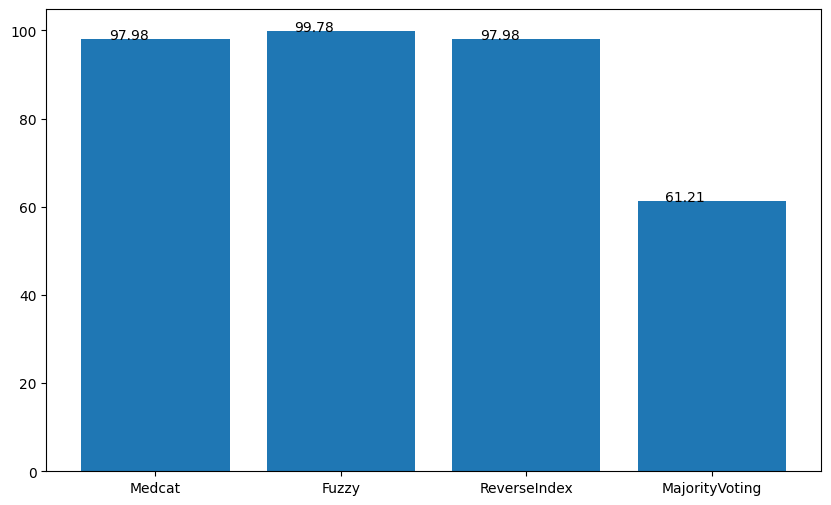

In [29]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [totalMedcatIllnessPercentage, totalFuzzyIllnessPercentage, totalReverseIndexIllnessPercentage, totalMajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot matching percentages

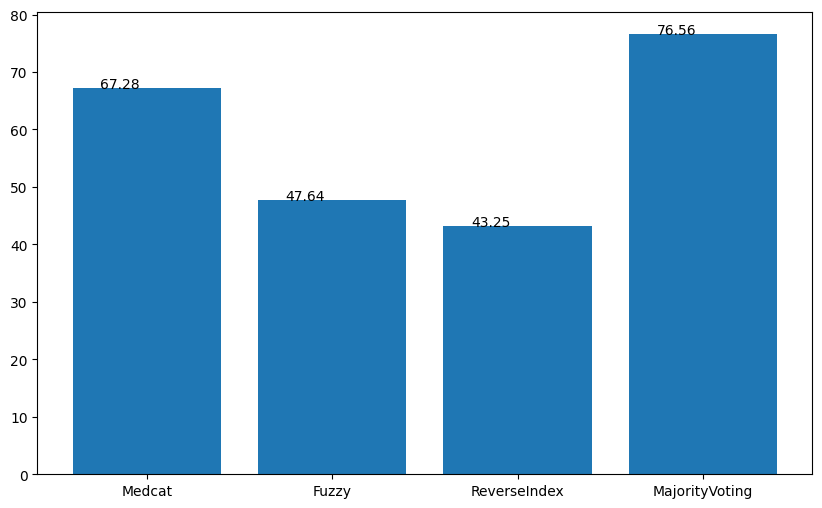

In [30]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [matchingMedcatIllnessPercentage, matchingFuzzyIllnessPercentage, matchingReverseIndexIllnessPercentage, matchingmajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

### Plot not matching percentages

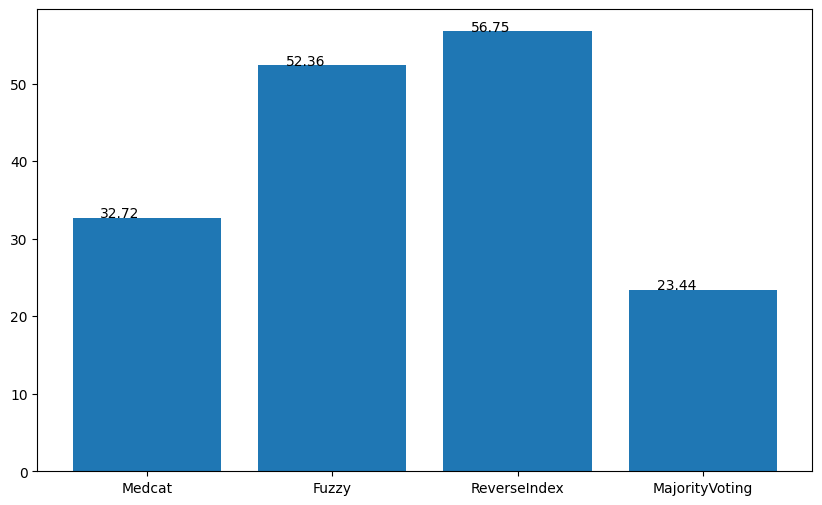

In [31]:
from matplotlib import pyplot as plt

labels= ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
y = [notMatchingMedcatIllnessPercentage, notMatchingFuzzyIllnessPercentage, notMatchingReverseIndexIllnessPercentage, notMatchingmajorityVotingIllnessPercentage]
# plt.figure(figsize=(10, 15))
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    x=labels,
    height=y,
    )
xlocs, xlabs = plt.xticks()
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

In [152]:
mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,Hemophilia,Hemophilia
123,lymphoedema,1495,Lymphedema,NaN,Lymphedema,Lymphoedema of leg,NaN
244,allergy to elastoplast,1670,Allergic disposition,NaN,Allergy to plant,Contact dermatitis: [chemicals] or [elastoplas...,NaN
300,hydatiform mole,1681,"Hydatidiform mole, benign",NaN,Hydatidiform mole,Cole disease,NaN
319,NaN,99999,NaN,NaN,NaN,NaN,NaN
357,burns,1407,Burn,NaN,Burn,Burn,Burn
369,phaeochromocytoma,1236,Pheochromocytoma,NaN,Phaeochromocytoma,Phaeochromocytoma,Phaeochromocytoma
371,opioid dependency,1409,Opioid dependence,NaN,Opioid dependence,Opioid dependence,Opioid dependence
382,diphtheria,1574,Diphtheria of penis,NaN,Diphtheria,Diphtheria,Diphtheria


In [153]:
mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
319,NaN,99999,NaN,NaN,NaN,NaN,NaN


In [154]:
mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
26,tonsiltis,1598,Tonsillitis,Tonsillitis,Tonsillitis,NaN,Tonsillitis
55,pemphigoid/pemphigus,1345,Pemphigoid,Pemphigoid,Pemphigus minor,NaN,NaN
56,hypothyroidism/myxoedema,1226,Myxedema,Myxedema,Iodine hypothyroidism,NaN,NaN
111,gastroenteritis/dysentry,1509,Gastroenteritis,Gastroenteritis,Adenoviral gastroenteritis,NaN,NaN
169,allergy/hypersensitivity/anaphylaxis,1374,Cutaneous hypersensitivity,Anaphylaxis,Non-allergic hypersensitivity to enalapril,NaN,NaN
319,NaN,99999,NaN,NaN,NaN,NaN,NaN
329,myositis/myopathy,1322,Disorder of muscle,Myositis,Myosin storage myopathy,NaN,NaN
350,schistosomiasis/bilharzia,1443,Infection by Schistosoma,Infection caused by Schistosoma,Schistosomiasis of bladder,NaN,NaN
380,neutropenia/lymphopenia,1448,Neutropenia,Neutropenia,Congenital neutropenia,NaN,NaN


In [155]:
mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
7,pleural plaques (not known asbestosis),1595,Asbestos-induced pleural plaque,Pleural plaque,Asbestos-induced pleural plaque,(Asbestosis) or (byssinosis) or (pleural plaqu...,NaN
8,grave's disease,1522,Graves' disease,Disease,Graves' disease,Graves' disease,Graves' disease
9,cervical problem,1553,Uterine cervix problem,Cervical,Cervical rib,Cervical incompetence with antenatal problem,NaN
11,fracture finger,1639,Fracture of phalanx of finger,Fracture,Fracture of finger,Fracture of finger,Fracture of finger
...,...,...,...,...,...,...,...
437,spinal abscess,1248,Spinal cord abscess,Abscess,Paraspinal abscess,Spinal subdural abscess,NaN
440,cranial nerve problem/palsy,1249,Cranial nerve disorder,Problem,O/E -cranial nerve -palsy -UMN,"O/E - cranial nerves 3,4 + 6",NaN
441,endometriosis,1402,Endometriosis (clinical),Endometriosis,Endometriosis,Endometriosis,Endometriosis
442,bell's palsy/facial nerve palsy,1250,Bell's palsy,Facial palsy,Bell's palsy &/or facial palsy,Bell's palsy,NaN


## Summary Plots

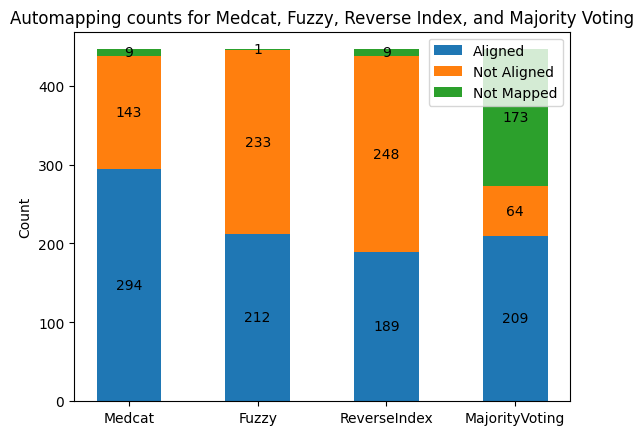

In [32]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
not_mapped = [
       (mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.medcatConcept.notna().sum()),
       (mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.fuzzyConcept.notna().sum()),
       (mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.reverseIndexConcept.notna().sum()),
       (mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.majorityVoting.notna().sum()),
       ]
matching = [
       mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.fuzzyConcept].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.reverseIndexConcept].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.majorityVoting].shape[0],
       ]
not_matching = [
       mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.fuzzyConcept)].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.reverseIndexConcept)].shape[0],
       mappedIllnessFinalDf[mappedIllnessFinalDf.majorityVoting.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.majorityVoting)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, matching, width, label='Aligned')
p2 = ax.bar(labels, not_matching, width, bottom=matching, label='Not Aligned')
p3 = ax.bar(labels, not_mapped, width, bottom=[v + not_matching[i] for i, v in enumerate(matching)], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, and Majority Voting')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')

plt.show()

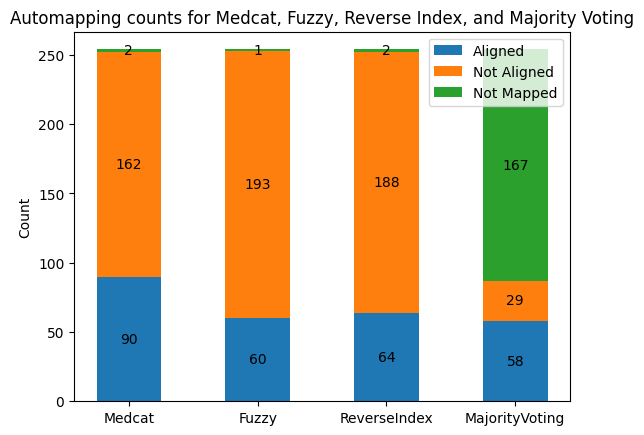

In [33]:
import matplotlib.pyplot as plt


labels = ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']
not_mapped = [
       (mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.medcatConcept.notna().sum()),
       (mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.fuzzyConcept.notna().sum()),
       (mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.reverseIndexConcept.notna().sum()),
       (mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.majorityVoting.notna().sum()),
       ]
matching = [
       mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.medcatConcept].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.fuzzyConcept].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.reverseIndexConcept].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.majorityVoting].shape[0],
       ]
not_matching = [
       mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.fuzzyConcept)].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.reverseIndexConcept)].shape[0],
       mappedOperationsFinalDf[mappedOperationsFinalDf.majorityVoting.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.majorityVoting)].shape[0],
       ]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(labels, matching, width, label='Aligned')
p2 = ax.bar(labels, not_matching, width, bottom=matching, label='Not Aligned')
p3 = ax.bar(labels, not_mapped, width, bottom=[v + not_matching[i] for i, v in enumerate(matching)], label='Not Mapped')

ax.set_ylabel('Count')
ax.set_title('Automapping counts for Medcat, Fuzzy, Reverse Index, and Majority Voting')
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p3, label_type='center')

plt.show()

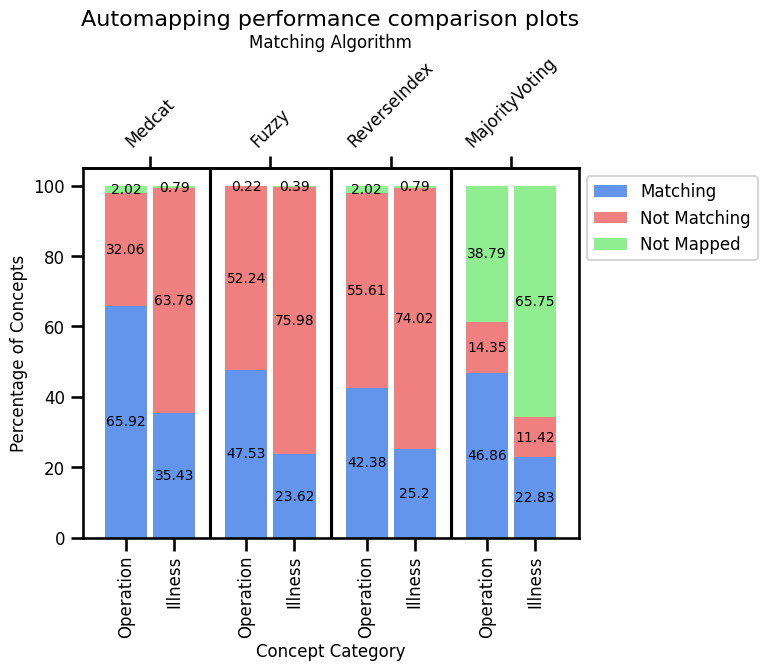

In [146]:
import matplotlib.pyplot as plt
import numpy as np


# labels = ['Op:Medcat', 'Op:Fuzzy', 'Op:ReverseIndex', 'Op:MajorityVoting', 'Il:Medcat', 'Il:Fuzzy', 'Il:ReverseIndex', 'Il:MajorityVoting']
labels = ['Medcat', 'Fuzzy', 'ReverseIndex', 'MajorityVoting']

operations_matching = np.array([
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.medcatConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.fuzzyConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.reverseIndexConcept].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.curatedConcept == mappedOperationsFinalDf.majorityVoting].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       ])

operations_not_matching = np.array([
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.medcatConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.medcatConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.fuzzyConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.fuzzyConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.reverseIndexConcept)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf[mappedOperationsFinalDf.majorityVoting.notna() & (mappedOperationsFinalDf.curatedConcept != mappedOperationsFinalDf.majorityVoting)].shape[0])/mappedOperationsFinalDf.shape[0] * 100, 2),
       ])

operations_not_mapped = np.array([
       round((mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.medcatConcept.notna().sum())/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.fuzzyConcept.notna().sum())/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.reverseIndexConcept.notna().sum())/mappedOperationsFinalDf.shape[0] * 100, 2),
       round((mappedOperationsFinalDf.shape[0] - mappedOperationsFinalDf.majorityVoting.notna().sum())/mappedOperationsFinalDf.shape[0] * 100, 2),
       ])

illness_matching = np.array([
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.medcatConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.fuzzyConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.reverseIndexConcept].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.curatedConcept == mappedIllnessFinalDf.majorityVoting].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       ])

illness_not_matching = np.array([
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.medcatConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.medcatConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.fuzzyConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.fuzzyConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.reverseIndexConcept.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.reverseIndexConcept)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf[mappedIllnessFinalDf.majorityVoting.notna() & (mappedIllnessFinalDf.curatedConcept != mappedIllnessFinalDf.majorityVoting)].shape[0])/mappedIllnessFinalDf.shape[0] * 100, 2),
       ])

illness_not_mapped = np.array([
       round((mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.medcatConcept.notna().sum())/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.fuzzyConcept.notna().sum())/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.reverseIndexConcept.notna().sum())/mappedIllnessFinalDf.shape[0] * 100, 2),
       round((mappedIllnessFinalDf.shape[0] - mappedIllnessFinalDf.majorityVoting.notna().sum())/mappedIllnessFinalDf.shape[0] * 100, 2),
       ])


# plot details
bar_width = 0.35
illness_bar_positions = np.arange(len(labels))
operations_bar_positions = illness_bar_positions + bar_width + 0.05
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

fig, ax = plt.subplots()
ax_t = ax.secondary_xaxis('top')

# make bar plots
illness_matching_bar = ax.bar(illness_bar_positions, illness_matching, bar_width, color='cornflowerblue')
illness_not_matching_bar = ax.bar(illness_bar_positions, illness_not_matching, bar_width, color='lightcoral', bottom=illness_matching)
illness_not_mapped_bar = ax.bar(illness_bar_positions, illness_not_mapped, bar_width, color='lightgreen', bottom=illness_matching + illness_not_matching)
operations_matching_bar = ax.bar(operations_bar_positions, operations_matching, bar_width, color='cornflowerblue', label='Matching')
operations_not_matching_bar = ax.bar(operations_bar_positions, operations_not_matching, bar_width, color='lightcoral', bottom=operations_matching, label='Not Matching')
operations_not_mapped_bar = ax.bar(operations_bar_positions, operations_not_mapped, bar_width, color='lightgreen', bottom=operations_matching + operations_not_matching, label='Not Mapped')

ax.bar_label(illness_matching_bar, label_type='center', fontsize=10)
ax.bar_label(illness_not_matching_bar, label_type='center', fontsize=10)
ax.bar_label(illness_not_mapped_bar, label_type='center', fontsize=10)
ax.bar_label(operations_matching_bar, label_type='center', fontsize=10)
ax.bar_label(operations_not_matching_bar, label_type='center', fontsize=10)
ax.bar_label(operations_not_mapped_bar, label_type='center', fontsize=10)

ax.axvline(x = 0.7, color='k')
ax.axvline(x = 1.7, color='k')
ax.axvline(x = 2.7, color='k')

ax.set_xticks(np.append(illness_bar_positions, operations_bar_positions), labels=['Operation'] * 4 + ['Illness'] * 4, rotation=90, fontsize=12)
ax_t.set_xticks((illness_bar_positions + operations_bar_positions)/2, labels=labels, rotation=45, fontsize=12)
ax_t.set_xlabel('Matching Algorithm', fontsize=12)
ax.set_ylabel('Percentage of Concepts', fontsize=12)
ax.set_xlabel('Concept Category', fontsize=12)
ax.set_title('Automapping performance comparison plots', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)

plt.show()

# Scratch space

In [17]:
mappedIllnessFinalDf[:20]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,diabetes,1220,Diabetes mellitus,Diabetes mellitus,Prediabetes,Diabetic neuropathy &/or diabetic polyneuropathy,NaN
1,fracture hand,1638,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand,Fracture of hand
2,uterine problem,1552,Uterus problem,Uterine structure,Uterine prolapse,Uterine contractions problem,NaN
3,asbestosis,1120,Asbestosis,Asbestosis,Asbestosis,Asbestosis,Asbestosis
4,haemophilia,1328,Hemophilia,NaN,Hemophilia,NaN,NaN
5,rheumatic fever,1479,Rheumatic fever,Rheumatic fever,Rheumatic fever,NaN,Rheumatic fever
6,diabetes insipidus,1521,Diabetes insipidus,Diabetes insipidus,Diabetes insipidus,Management of diabetes insipidus,Diabetes insipidus
7,pleural plaques (not known asbestosis),1595,Asbestos-induced pleural plaque,Pleural plaque,Asbestos-induced pleural plaque,NaN,NaN
8,grave's disease,1522,Graves' disease,Disease,Graves' disease,NaN,NaN
9,cervical problem,1553,Uterine cervix problem,Cervical,Cervical rib,NaN,NaN


In [183]:
from whoosh.index import create_in
from whoosh import scoring
from whoosh.fields import *


matchingConcept = None

import os

if not os.path.isdir("/tmp/indexdir"):
    os.makedirs("/tmp/indexdir")

schema = Schema(concept=TEXT(stored=True))
ix = create_in("/tmp/indexdir", schema)

writer = ix.writer()
# standardConcepts = illnessDf[illnessDf.concept_name.apply(lambda x: 'diabetes' in str(x).lower())].concept_name
standardConcepts = operationsDf.concept_name
for standardConcept in standardConcepts:
    writer.add_document(concept=standardConcept)
writer.commit()

matchingConcepts = []

# from whoosh.qparser import QueryParser
from whoosh import qparser
with ix.searcher(weighting=scoring.BM25F()) as searcher:
    # query = QueryParser("concept", ix.schema).parse('diabetes')
    # results = searcher.search(query)

    from tqdm import tqdm

    for i, sourceName in tqdm(enumerate(mappedOperationsFinalDf.sourceName)):
    # for i, sourceName in tqdm(enumerate(['exercise ecg'])):
        andParser = qparser.QueryParser("concept", ix.schema)
        andParser.add_plugin(qparser.FuzzyTermPlugin())
        andSearchTerm = "~1 AND ".join(str(sourceName).split()) + "~1"
        andQueryFuzzy = andParser.parse(andSearchTerm)
        andResultsFuzzy = searcher.search(andQueryFuzzy)
        orParser = qparser.QueryParser("concept", ix.schema)
        orParser.add_plugin(qparser.FuzzyTermPlugin())
        orSearchTerm = " OR ".join(str(sourceName).split())
        orQueryFuzzy = orParser.parse(orSearchTerm)
        orResultsFuzzy = searcher.search(orQueryFuzzy)
        parser = qparser.QueryParser("concept", ix.schema)
        query = parser.parse(str(sourceName))
        results = searcher.search(query)
        # results.upgrade(andResultsFuzzy)
        # results.upgrade(andResultsFuzzy)
        results.extend(andResultsFuzzy)
        results.extend(orResultsFuzzy)
        resultsRow = [sourceName, None]
        if len(results) > 0:
            resultsRow[1] = results[0]['concept']
        matchingConcepts.append(resultsRow)
            # print(sourceName, hit.score, hit.rank, hit.docnum, hit['concept'])
#         if i > 10:
#             break
matchingConcepts

254it [00:20, 12.51it/s]


[['scan / x-ray', 'Dual energy X-ray absorptiometry scan of wrist'],
 ['exercise ecg', 'Standard ECG'],
 ['liver surgery', 'Thumb surgery'],
 ['lymph node surgery',
  'Excision of inguinal lymph node and pelvic lymph node'],
 ['bone marrow biopsy', 'Non-surgical bone marrow biopsy'],
 ['duodenal surgery', 'Duodenal switch'],
 ['barium meal / barium swallow', 'Barium swallow'],
 ['ecg/electrocardiogram', 'ECG (electrocardiogram) rhythm strip monitoring'],
 ['mastoidectomy/mastoid surgery', 'Thumb surgery'],
 ['breast cyst/abscess removal',
  'Diagnostic aspiration of liver cyst or abscess'],
 ['muscle/soft tissue surgery',
  'Guided periodontal tissue regeneration surgery'],
 ['achilles tendon repair',
  'Anesthesia for repair of ruptured Achilles tendon'],
 ['pacemaker battery change',
  'Maintenance of battery of cardiac pacemaker system'],
 ['cervical polyps removed', 'Fulguration of urethral polyps'],
 ['biliary surgery', 'Biliary drainage'],
 ['barium enema', 'Barium enema'],
 ['li

In [134]:
resultsDf = pd.DataFrame(matchingConcepts, columns=['query', 'match'])
resultsDf

,query,match
0,scan / x-ray,Dual energy X-ray absorptiometry scan of wrist
1,exercise ecg,EEG and EMG myoclonus recording
2,liver surgery,Pretransplant evaluation of live liver donor
3,lymph node surgery,Examination of lymph nodes
4,bone marrow biopsy,Non-surgical bone marrow biopsy
...,...,...
249,pancreatic transplant,Whole organ pancreatic transplant
250,amputation of toe,Amputation of toe
251,amputation of leg,Amputation of leg through tibia and fibula
252,endometrial ablation,Endometrial ablation


In [135]:
resultsDf.match.notna().sum()

251

In [94]:
mappedOperationsFinalDf

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,scan / x-ray,1603,Radiographic imaging procedure,Radiographic imaging procedure,Scapula X-ray,NaN,NaN
1,exercise ecg,1599,Electrocardiogram with exercise test,Electrocardiogram with exercise test,Exercise challenge,NaN,NaN
2,liver surgery,1450,Operation on liver,Operation on liver,Laser surgery,NaN,NaN
3,lymph node surgery,1537,Operation on lymph node,Structure of lymph node,Procedure on lymph node,NaN,NaN
4,bone marrow biopsy,1615,Bone marrow sampling,Bone marrow sampling,Biopsy of bone,Bone marrow biopsy (& non-surgical),NaN
...,...,...,...,...,...,...,...
249,pancreatic transplant,1457,Transplantation of pancreas,Transplantation of pancreas,Pancreatic transplant,Pancreatic transplant,Pancreatic transplant
250,amputation of toe,1442,Amputation of toe,Amputation of toe,Amputation of toe,NaN,Amputation of toe
251,amputation of leg,1440,Amputation of lower limb,Amputation of lower limb,Amputation of leg,NaN,NaN
252,endometrial ablation,1360,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation,Endometrial ablation


In [59]:
mappedOperationsFinalDf[mappedOperationsFinalDf.reverseIndexConcept.isna()]

,sourceName,sourceValueCode,curatedConcept,medcatConcept,fuzzyConcept,reverseIndexConcept,majorityVoting
0,scan / x-ray,1603,Radiographic imaging procedure,Radiographic imaging procedure,Scapula X-ray,NaN,NaN
1,exercise ecg,1599,Electrocardiogram with exercise test,Electrocardiogram with exercise test,Exercise challenge,NaN,NaN
2,liver surgery,1450,Operation on liver,Operation on liver,Laser surgery,NaN,NaN
3,lymph node surgery,1537,Operation on lymph node,Structure of lymph node,Procedure on lymph node,NaN,NaN
5,duodenal surgery,1529,Operation on duodenum,Duodenal,Optional surgery,NaN,NaN
...,...,...,...,...,...,...,...
244,amputation of foot,1441,Amputation of the foot,Amputation of the foot,Amputation of foot,NaN,NaN
245,hand/finger surgery,1534,Operative procedure on hand,Finger operation,Intersex surgery,NaN,NaN
246,NaN,99999,NaN,NaN,NaN,NaN,NaN
250,amputation of toe,1442,Amputation of toe,Amputation of toe,Amputation of toe,NaN,Amputation of toe
